# Initialize

In [1]:
visible_devices = [3]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std, compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "../results/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-08 13:32:15.009846: Importing os...
2024-04-08 13:32:15.010688: Importing sys...
Visible devices: [3]
2024-04-08 13:32:15.011104: Importing timer from timeit...
2024-04-08 13:32:15.011214: Setting env variables for tf import (only device(s) [3] will be available)...
2024-04-08 13:32:15.011413: Importing numpy...
2024-04-08 13:32:15.151119: Importing matplotlib...
2024-04-08 13:32:15.489379: Importing h5py...
2024-04-08 13:32:15.512732: Importing importlib.util...
2024-04-08 13:32:15.512848: Importing json...
2024-04-08 13:32:15.512928: Importing pandas...
2024-04-08 13:32:15.931147: Importing random...
2024-04-08 13:32:15.931316: Importing scipy utils...
2024-04-08 13:32:16.269603: Importing subprocess...
2024-04-08 13:32:16.269780: Importing tensorflow...
Tensorflow version: 2.12.0
2024-04-08 13:32:18.730204: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-04-08 13:32:19.127262: Importing timeit...
2024-04-08 13:32:19.127409: Importing tqdm...
2

# Null distributions

## Loading MoG Models null distributions

In [28]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

rows = []
for ndims in [5,20,100]:
    for nsamples in [10_000, 20_000, 50_000, 100_000, 200_000]:
        file_path = f"../results/"+str(ndims)+"D_"+str(int(nsamples/1000))+"K/null_hypothesis/FPD.json"
        try:
            with open(file_path, 'r') as f:
                result = json.load(f)[0]
            result_value = result.pop("result_value")
            #print(f"type(result_value): {type(result_value)}")
            #print(f"result_value.keys(): {result_value.keys()}")
            dist_null = result_value["metric_list"]
            #print(f"dist_null: {dist_null}")
            result["metric_list"] = dist_null
            result["metric_error_list"] = result_value["metric_error_list"]
            result["metric_mean"] = np.mean(dist_null)
            for cl in cl_list:
                result["metric_"+str(int(cl*100))] = np.sort(dist_null)[int(len(dist_null)*cl)]
            rows.append(result)
        except FileNotFoundError:
            print(f"File not found: {file_path}")
            continue  # Skip this file if not found
df = pd.DataFrame(rows)
display(df)

File not found: ../results/20D_200K/null_hypothesis/FPD.json
File not found: ../results/100D_20K/null_hypothesis/FPD.json
File not found: ../results/100D_200K/null_hypothesis/FPD.json


,timestamp,test_name,is_symb_1,is_symb_2,ndims,niter,batch_size_test,batch_size_gen,dtype,small_sample_threshold,...,niter_used,batch_size_test_used,computing_time,backend,metric_list,metric_error_list,metric_mean,metric_68,metric_95,metric_99
0,2024-04-07T11:55:02.814490,FPD Test_tf,True,True,5,10000,10000,10000,float64,10000000,...,10000,10000,301.883839,tensorflow,"[8.66753275793417e-05, 8.13903556894572e-05, 0...","[4.197162693673372e-05, 3.7493453394044925e-05...",0.000077,0.000102,0.000156,0.000223
1,2024-04-08T13:35:43.981836,FPD Test_tf,True,True,5,10000,20000,1000,float64,10000000,...,10000,20000,612.641716,tensorflow,"[8.72431487506746e-05, 6.126408712673598e-05, ...","[1.9424475782093406e-05, 2.2887457706032458e-0...",0.000074,0.000075,0.000106,0.000136
2,2024-04-07T21:24:00.912464,FPD Test_tf,True,True,5,10000,50000,1000,float64,10000000,...,10000,50000,1448.558090,tensorflow,"[4.2049854089932896e-05, 4.3186090442160044e-0...","[2.567742239120991e-05, 2.4744560923581365e-05...",0.000045,0.000045,0.000054,0.000064
3,2024-04-07T12:42:07.224610,FPD Test_tf,True,True,5,10000,100000,1000,float64,10000000,...,10000,100000,2689.583556,tensorflow,"[3.559527974533812e-05, 3.5851346672393476e-05...","[3.0449290016816354e-05, 3.0297156501619723e-0...",0.000037,0.000037,0.000041,0.000045
4,2024-04-07T23:25:51.188656,FPD Test_tf,True,True,5,10000,200000,1000,float64,10000000,...,10000,200000,5361.822901,tensorflow,"[3.290404595949749e-05, 3.280354443084591e-05,...","[3.287903553171638e-05, 3.2994442305534486e-05...",0.000034,0.000034,0.000035,0.000037
5,2024-04-07T11:57:42.541336,FPD Test_tf,True,True,20,10000,10000,10000,float64,10000000,...,10000,10000,454.341732,tensorflow,"[1.6866590669267767e-07, 0.001261442636732301,...","[0.000247642544247114, 0.0003025424766449451, ...",0.000575,0.000667,0.001322,0.001961
6,2024-04-08T13:41:08.807193,FPD Test_tf,True,True,20,10000,20000,1000,float64,10000000,...,10000,20000,875.557583,tensorflow,"[2.968762323061775e-06, 8.376409199528186e-05,...","[6.61296572655552e-05, 6.032659687912038e-05, ...",0.000298,0.000340,0.000666,0.000940
7,2024-04-07T23:25:25.781172,FPD Test_tf,True,True,20,10000,50000,1000,float64,10000000,...,10000,50000,1859.964430,tensorflow,"[0.00019496685365305696, 0.0001880081716594400...","[4.3905631854668265e-05, 4.452478107823788e-05...",0.000280,0.000311,0.000403,0.000503
8,2024-04-07T14:00:46.977092,FPD Test_tf,True,True,20,10000,100000,1000,float64,10000000,...,10000,100000,5397.108640,tensorflow,"[0.00015202461551097686, 0.0001311635826309640...","[4.048695600545556e-05, 3.5391968932150355e-05...",0.000153,0.000157,0.000199,0.000284
9,2024-04-07T12:27:25.277216,FPD Test_tf,True,True,100,10000,10000,10000,float64,10000000,...,10000,10000,2225.652572,tensorflow,"[0.006215732305064413, 0.005035020066667378, 0...","[0.0009032944455791196, 0.0012737279304420941,...",0.005322,0.006037,0.009022,0.011126


### Plots of null-distributions

In [79]:
df_sub = df[(df["ndims"]==5) & (df["batch_size_test"]==10_000)]
df_sub["metric_list"].values[0]

[8.66753275793417e-05,
 8.13903556894572e-05,
 0.00010988800376668431,
 5.01447868252711e-05,
 2.374158448051141e-05,
 3.931413885107945e-05,
 0.00010958995423929805,
 0.00012857743022400686,
 7.740726908411466e-05,
 0.00011265169505568625,
 0.0001059275759964869,
 0.00011119782401339116,
 2.393101590977778e-05,
 0.00011690740660012874,
 1.8654933857452252e-05,
 1.5858375178962533e-05,
 1.3488643803466488e-05,
 0.0001232500960911621,
 0.00010074550353177045,
 9.952087425476181e-05,
 4.2257820740383126e-05,
 3.263465670128455e-05,
 0.00011718998510723804,
 0.00019556038198027107,
 9.637833473871758e-05,
 3.7363526592615705e-05,
 3.5248116613376736e-05,
 0.0002397891728158865,
 1.0130635815461993e-05,
 9.05461873609154e-05,
 3.293471157121609e-05,
 0.00011371672455039376,
 0.00010711767207599994,
 0.00018772958802974247,
 0.00010196370168284388,
 6.407722662480955e-05,
 5.2537594118076515e-05,
 0.0001255486396381562,
 7.833094965347869e-05,
 5.126677463104294e-05,
 7.364028597309164e-05,


Plotting curve for 5 dimensions and 10000 samples.
mu = 0.770602764568853 +/- 0.0021730387386782496
sigma = 0.4661586359468469 +/- 0.005199763058060316
68% CL: 1.0175550386551708  - Normal approx: 1.2367614005157
95% CL: 1.5583746551772077  - Normal approx: 1.702920036462547
99% CL: 2.2347410983350775  - Normal approx: 2.169078672409394

Plotting curve for 5 dimensions and 20000 samples.
mu = 0.7425281989485039 +/- 0.00025349795508673744
sigma = 0.15921619110088567 +/- 0.0031363868625666792
68% CL: 0.7545318177593169  - Normal approx: 0.9017443900493896
95% CL: 1.0559917925332138  - Normal approx: 1.0609605811502751
99% CL: 1.3554868434637959  - Normal approx: 1.2201767722511607

Plotting curve for 5 dimensions and 50000 samples.
mu = 0.4483104361020635 +/- 2.3245406257922982e-05
sigma = 0.048213490081016726 +/- 0.0009307560250388151
68% CL: 0.45226688115357583  - Normal approx: 0.4965239261830802
95% CL: 0.5398123973119404  - Normal approx: 0.544737416264097
99% CL: 0.635407785000780

/tmp/ipykernel_27280/2231399885.py:54: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_27280/2231399885.py:72: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


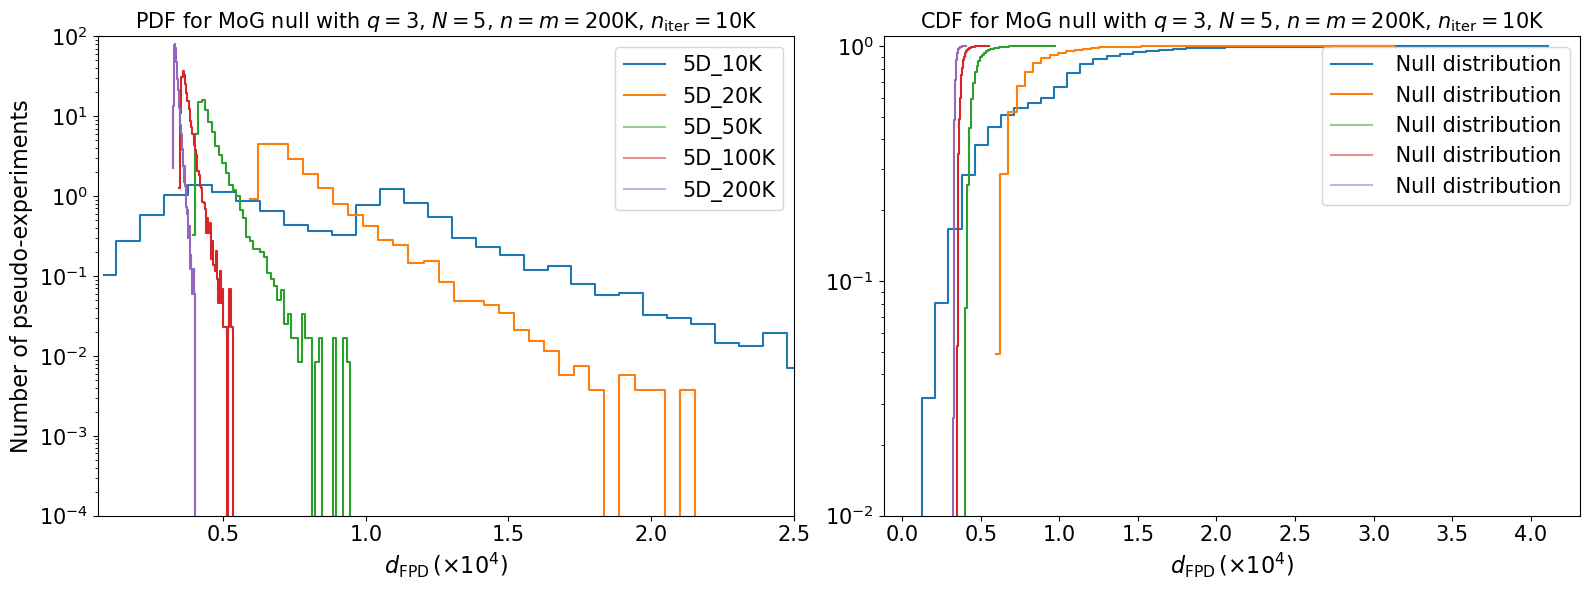

Time elapsed: 0.7141517239997484 seconds.


In [91]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ncomp_dict = {5: 3, 20: 5, 100: 10}
dash_styles = ['-', '--', '-.']
colors = ["royalblue", "darkorange", "mediumseagreen"]

start = timer()
for ndims in [5]:#,20,100]:
    for nsamples in [10_000, 20_000, 50_000, 100_000, 200_000]:
        try:
            print("\nPlotting curve for", ndims, "dimensions and", nsamples, "samples.")
            df_sub = df[(df["ndims"]==ndims) & (df["batch_size_test"]==nsamples)]
            name = str(ndims)+"D_"+str(int(nsamples/1000))+"K"
            name_cap = name.upper()
            latex = r"$d_{\mathrm{FPD}}\,\left(\times 10^{4}\right)$"
            ncomp = ncomp_dict[ndims]
    
            niter = df_sub["niter"].values[0]
            ns = nsamples**2 /(2*nsamples)
            dist_null = np.array(df_sub["metric_list"].values[0])*10_000
    
            xscale = 'linear'
            yscale = 'log'
            num_bins = 50  # number of bins|
    
            mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std    (dist_null), se_std(dist_null))
            print("mu =", mu, "+/-", deltamu)
            print("sigma =", sigma, "+/-", deltasigma)
            print("68% CL:", np.sort(dist_null)[int(len(dist_null)*0.68)]," - Normal approx:", mu + sigma)
            print("95% CL:", np.sort(dist_null)[int(len(dist_null)*0.95)]," - Normal approx:", mu + 2*sigma)
            print("99% CL:", np.sort(dist_null)[int(len(dist_null)*0.99)]," - Normal approx:", mu + 3*sigma)
            min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
            x = np.linspace(min_x, max_x, num_bins + 1)
            counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
            cum_counts = np.cumsum(counts)/np.sum(counts)
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
            # Create step plot
            step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
            step_counts = counts[:-1]  # assuming counts is one element longer than step_edges
    
            ax[0].step(step_edges, step_counts, where='mid', linestyle='-', label = name_cap)
            current_ylim0 = ax[0].get_ylim()
            ax[0].set_xscale(xscale)
            ax[0].set_yscale(yscale)
            ax[0].set_xlabel(r"%s"%latex, fontsize=16)
            ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
            ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(  int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K',  fontsize=15)
            ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
            ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
            ax[0].set_xlim(0.06, 2.5)
            ax[0].set_ylim(0.0001, 100)
            legend0 = ax[0].legend(loc='upper right', fontsize=15)
            for handle in legend0.legendHandles[-3:]:
                handle.set_alpha(0.5)  # Set to desired alpha value
    
            # Create step plot
            step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
            step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
            ax[1].step(step_edges, step_counts, where='mid', linestyle='-', label =   " Null distribution")
            current_ylim1 = ax[1].get_ylim()
            ax[1].set_xscale(xscale)
            ax[1].set_yscale(yscale)
            ax[1].set_xlabel(r"%s"%latex, fontsize=16)
            ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='   +str(  int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K',  fontsize=15)
            ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
            ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
            ax[1].set_ylim(0.01,1.1)
    
            legend1 = ax[1].legend(loc='upper right', fontsize=15)
            for handle in legend1.legendHandles[-3:]:
                handle.set_alpha(0.5)  # Set to desired alpha value
            
            i+=1
            #plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
            #plt.tight_layout()
            ##plt.savefig(figure_file)
            #plt.show()
        except:
            pass

plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
plt.tight_layout()
#plt.savefig(figure_file)
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")


Plotting curve for 20 dimensions and 10000 samples.
mu = 0.5752881947169551 +/- 0.0015649503276510487
sigma = 0.3955945307573209 +/- 0.004808078620866064
68% CL: 0.6669445748113885  - Normal approx: 0.970882725474276
95% CL: 1.3217846893085319  - Normal approx: 1.366477256231597
99% CL: 1.9605548728214763  - Normal approx: 1.7620717869889178

Plotting curve for 20 dimensions and 20000 samples.
mu = 0.2975441198587966 +/- 0.00037151003101117504
sigma = 0.19274595482426474 +/- 0.0022003667327399772
68% CL: 0.34022145811184723  - Normal approx: 0.4902900746830613
95% CL: 0.6656309032713403  - Normal approx: 0.6830360295073261
99% CL: 0.9396392818208311  - Normal approx: 0.8757819843315908

Plotting curve for 20 dimensions and 50000 samples.
mu = 0.28031505168512305 +/- 5.983413399406649e-05
sigma = 0.07735252678100858 +/- 0.0007791856624571788
68% CL: 0.31117601754665936  - Normal approx: 0.3576675784661316
95% CL: 0.402699214408605  - Normal approx: 0.4350201052471402
99% CL: 0.50272334

/tmp/ipykernel_27280/154487056.py:54: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_27280/154487056.py:72: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


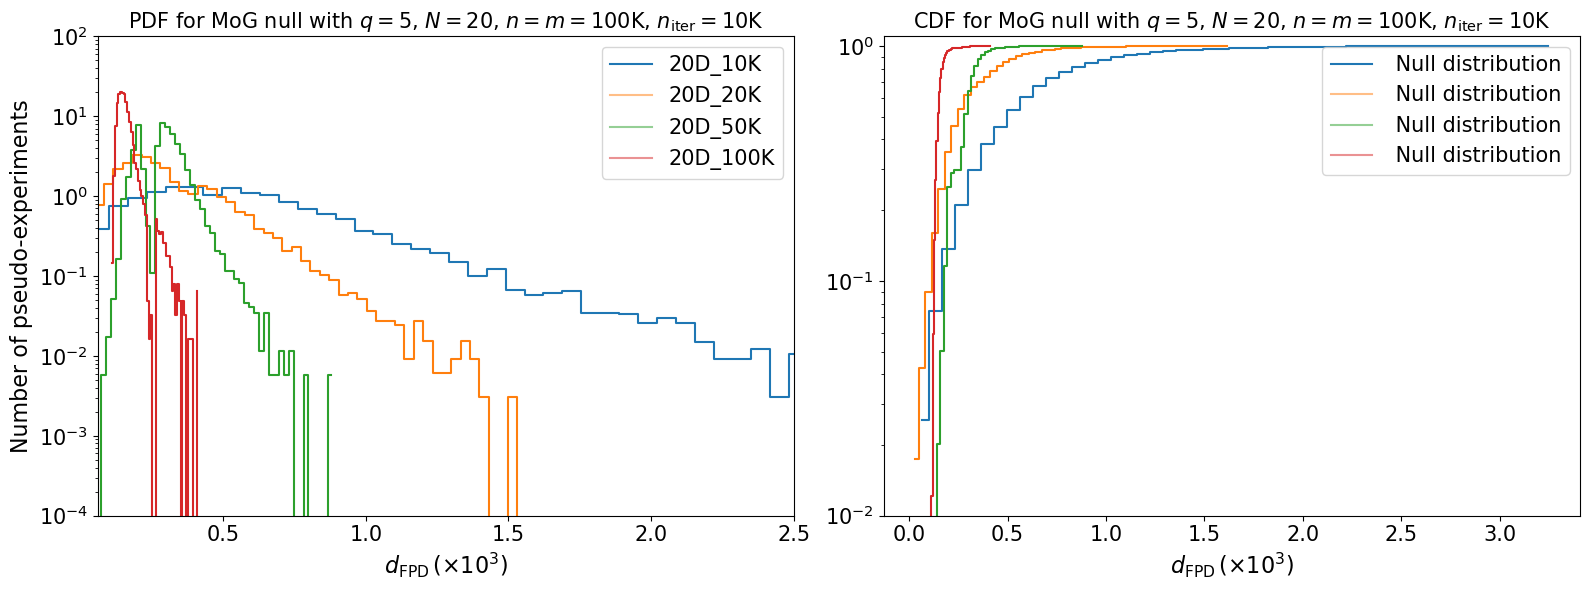

Time elapsed: 0.9689070219992573 seconds.


In [90]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ncomp_dict = {5: 3, 20: 5, 100: 10}
dash_styles = ['-', '--', '-.']
colors = ["royalblue", "darkorange", "mediumseagreen"]

start = timer()
for ndims in [20]:
    for nsamples in [10_000, 20_000, 50_000, 100_000, 200_000]:
        try:
            print("\nPlotting curve for", ndims, "dimensions and", nsamples, "samples.")
            df_sub = df[(df["ndims"]==ndims) & (df["batch_size_test"]==nsamples)]
            name = str(ndims)+"D_"+str(int(nsamples/1000))+"K"
            name_cap = name.upper()
            latex = r"$d_{\mathrm{FPD}}\,\left(\times 10^{3}\right)$"
            ncomp = ncomp_dict[ndims]
    
            niter = df_sub["niter"].values[0]
            ns = nsamples**2 /(2*nsamples)
            dist_null = np.array(df_sub["metric_list"].values[0])*1_000
    
            xscale = 'linear'
            yscale = 'log'
            num_bins = 50  # number of bins|
    
            mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std    (dist_null), se_std(dist_null))
            print("mu =", mu, "+/-", deltamu)
            print("sigma =", sigma, "+/-", deltasigma)
            print("68% CL:", np.sort(dist_null)[int(len(dist_null)*0.68)]," - Normal approx:", mu + sigma)
            print("95% CL:", np.sort(dist_null)[int(len(dist_null)*0.95)]," - Normal approx:", mu + 2*sigma)
            print("99% CL:", np.sort(dist_null)[int(len(dist_null)*0.99)]," - Normal approx:", mu + 3*sigma)
            min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
            x = np.linspace(min_x, max_x, num_bins + 1)
            counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
            cum_counts = np.cumsum(counts)/np.sum(counts)
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
            # Create step plot
            step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
            step_counts = counts[:-1]  # assuming counts is one element longer than step_edges
    
            ax[0].step(step_edges, step_counts, where='mid', linestyle='-', label = name_cap)
            current_ylim0 = ax[0].get_ylim()
            ax[0].set_xscale(xscale)
            ax[0].set_yscale(yscale)
            ax[0].set_xlabel(r"%s"%latex, fontsize=16)
            ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
            ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(  int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K',  fontsize=15)
            ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
            ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
            ax[0].set_xlim(0.06, 2.5)
            ax[0].set_ylim(0.0001, 100)
            legend0 = ax[0].legend(loc='upper right', fontsize=15)
            for handle in legend0.legendHandles[-3:]:
                handle.set_alpha(0.5)  # Set to desired alpha value
    
            # Create step plot
            step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
            step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
            ax[1].step(step_edges, step_counts, where='mid', linestyle='-', label =   " Null distribution")
            current_ylim1 = ax[1].get_ylim()
            ax[1].set_xscale(xscale)
            ax[1].set_yscale(yscale)
            ax[1].set_xlabel(r"%s"%latex, fontsize=16)
            ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='   +str(  int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K',  fontsize=15)
            ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
            ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
            ax[1].set_ylim(0.01,1.1)
    
            legend1 = ax[1].legend(loc='upper right', fontsize=15)
            for handle in legend1.legendHandles[-3:]:
                handle.set_alpha(0.5)  # Set to desired alpha value
            
            i+=1
            #plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
            #plt.tight_layout()
            ##plt.savefig(figure_file)
            #plt.show()
        except:
            pass

plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
plt.tight_layout()
#plt.savefig(figure_file)
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")


Plotting curve for 100 dimensions and 10000 samples.
mu = 1.5965862756027167 +/- 0.003661017209936026
sigma = 0.6050634024576289 +/- 0.005139313909604233
68% CL: 1.8110248679460155  - Normal approx: 2.2016496780603454
95% CL: 2.7065500718119027  - Normal approx: 2.8067130805179747
99% CL: 3.337786419213485  - Normal approx: 3.411776482975603

Plotting curve for 100 dimensions and 20000 samples.

Plotting curve for 100 dimensions and 50000 samples.
mu = 0.32057505789496 +/- 0.00014813393266098433
sigma = 0.12171028414270682 +/- 0.0009994344844721553
68% CL: 0.3668913884592632  - Normal approx: 0.4422853420376668
95% CL: 0.5361027820811874  - Normal approx: 0.5639956261803736
99% CL: 0.67053370039313  - Normal approx: 0.6857059103230805

Plotting curve for 100 dimensions and 100000 samples.
mu = 0.21702869714006537 +/- 5.779811664111863e-05
sigma = 0.07602507260181908 +/- 0.0005658297615346104
68% CL: 0.2453527710734046  - Normal approx: 0.29305376974188446
95% CL: 0.35934406345966424  

/tmp/ipykernel_27280/3571277171.py:54: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_27280/3571277171.py:72: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


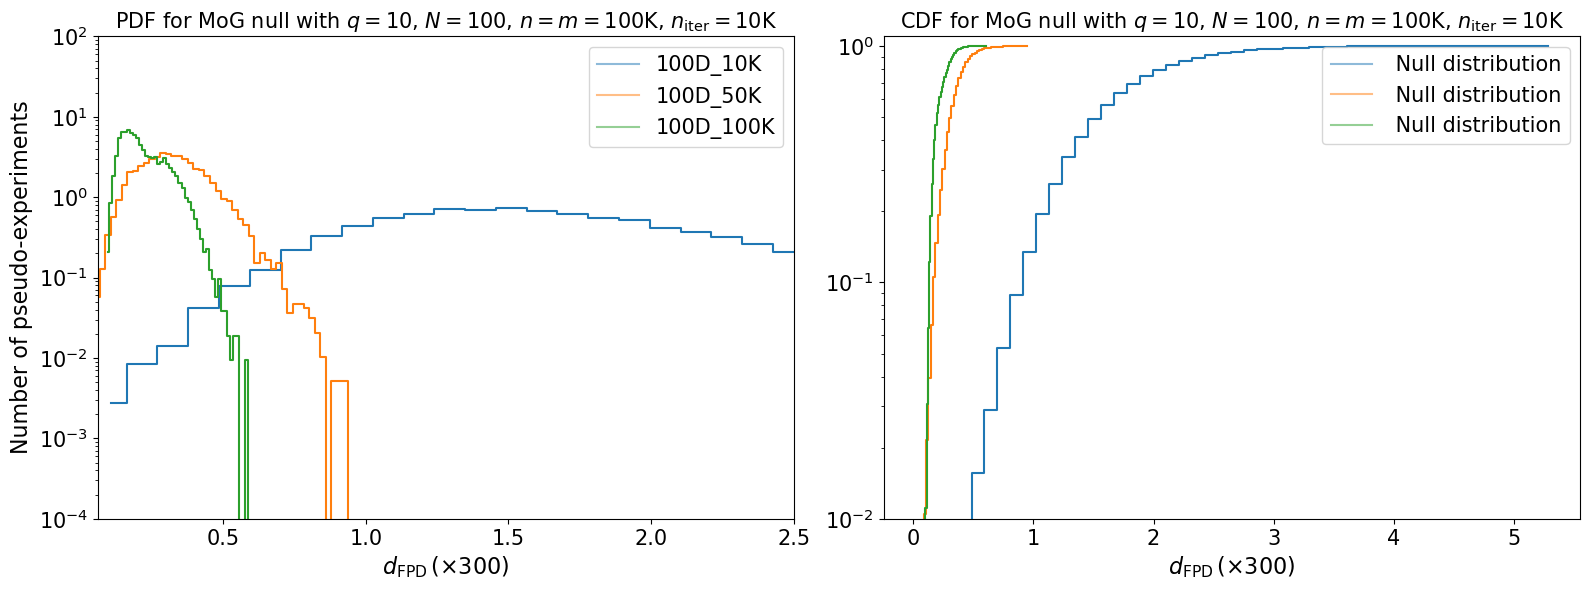

Time elapsed: 0.9668244779986708 seconds.


In [89]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ncomp_dict = {5: 3, 20: 5, 100: 10}
dash_styles = ['-', '--', '-.']
colors = ["royalblue", "darkorange", "mediumseagreen"]

start = timer()
for ndims in [100]:
    for nsamples in [10_000, 20_000, 50_000, 100_000, 200_000]:
        try:
            print("\nPlotting curve for", ndims, "dimensions and", nsamples, "samples.")
            df_sub = df[(df["ndims"]==ndims) & (df["batch_size_test"]==nsamples)]
            name = str(ndims)+"D_"+str(int(nsamples/1000))+"K"
            name_cap = name.upper()
            latex = r"$d_{\mathrm{FPD}}\,\left(\times 300\right)$"
            ncomp = ncomp_dict[ndims]
    
            niter = df_sub["niter"].values[0]
            ns = nsamples**2 /(2*nsamples)
            dist_null = np.array(df_sub["metric_list"].values[0])*300
    
            xscale = 'linear'
            yscale = 'log'
            num_bins = 50  # number of bins|
    
            mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std    (dist_null), se_std(dist_null))
            print("mu =", mu, "+/-", deltamu)
            print("sigma =", sigma, "+/-", deltasigma)
            print("68% CL:", np.sort(dist_null)[int(len(dist_null)*0.68)]," - Normal approx:", mu + sigma)
            print("95% CL:", np.sort(dist_null)[int(len(dist_null)*0.95)]," - Normal approx:", mu + 2*sigma)
            print("99% CL:", np.sort(dist_null)[int(len(dist_null)*0.99)]," - Normal approx:", mu + 3*sigma)
            min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
            x = np.linspace(min_x, max_x, num_bins + 1)
            counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
            cum_counts = np.cumsum(counts)/np.sum(counts)
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
            # Create step plot
            step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
            step_counts = counts[:-1]  # assuming counts is one element longer than step_edges
    
            ax[0].step(step_edges, step_counts, where='mid', linestyle='-', label = name_cap)
            current_ylim0 = ax[0].get_ylim()
            ax[0].set_xscale(xscale)
            ax[0].set_yscale(yscale)
            ax[0].set_xlabel(r"%s"%latex, fontsize=16)
            ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
            ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(  int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K',  fontsize=15)
            ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
            ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
            ax[0].set_xlim(0.06, 2.5)
            ax[0].set_ylim(0.0001, 100)
            legend0 = ax[0].legend(loc='upper right', fontsize=15)
            for handle in legend0.legendHandles[-3:]:
                handle.set_alpha(0.5)  # Set to desired alpha value
    
            # Create step plot
            step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
            step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
            ax[1].step(step_edges, step_counts, where='mid', linestyle='-', label =   " Null distribution")
            current_ylim1 = ax[1].get_ylim()
            ax[1].set_xscale(xscale)
            ax[1].set_yscale(yscale)
            ax[1].set_xlabel(r"%s"%latex, fontsize=16)
            ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='   +str(  int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K',  fontsize=15)
            ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
            ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
            ax[1].set_ylim(0.01,1.1)
    
            legend1 = ax[1].legend(loc='upper right', fontsize=15)
            for handle in legend1.legendHandles[-3:]:
                handle.set_alpha(0.5)  # Set to desired alpha value
            
            i+=1
            #plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
            #plt.tight_layout()
            ##plt.savefig(figure_file)
            #plt.show()
        except:
            pass

plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
plt.tight_layout()
#plt.savefig(figure_file)
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

## Null hypotheses

### Model definition

In [ ]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
batch_size_test = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

In [ ]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

### Set up tests and metrics configurations

In [ ]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

In [ ]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                      "object_name": "FNMetric",
                                      "class_name": "GMetrics.FNMetric",
                                      "kwargs": {},
                                      "result_key": "metric_list", 
                                      "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                      "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                      "test_config": test_config_null,
                                      "max_vectorize": 5000, # optimized for 5D
                                      "latex": "$\overline{\|\cdot\|}_{F}$",
                                      "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000, # optimized for 5D
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 4, # optimized for 5D
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

### Evaluate null hypotheses

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [ ]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 1.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}

In [ ]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

### Show and save results

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

In [ ]:
result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$")

In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

# Fixed $n=20000$

## Null hypotheses

### Model definition

In [ ]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
batch_size_test = 20_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

In [ ]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 1_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

### Set up tests and metrics configurations

In [ ]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value
    
test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

In [ ]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 40,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 40,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

### Evaluate null hypotheses

In [ ]:
for metric in list(metrics_config[unique_key].values())[1:2]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and saving {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[1:2]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

### Plots of null-distributions

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [ ]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 1.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}

In [ ]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

### Show and save results

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

# Fixed $n=100000$

## Null hypotheses

### Model definition

In [ ]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
batch_size_test = 100_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

In [ ]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 1_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

### Set up tests and metrics configurations

In [ ]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value
    
test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

In [ ]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: (ns/ndims)**(3/2)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: ns/np.sqrt(ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 40,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 40,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

### Evaluate null hypotheses

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and saving {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

### Plots of null-distributions

In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [ ]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 1.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}

In [ ]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

### Show and save results

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

# Fixed $\epsilon$

In [ ]:
fpd_results = {5: {10_000: [[0.68, 0.00010175550386551708], 
                            [0.95, 0.00015583746551772079], 
                            [0.99, 0.00022347410983350775]],
                   50_000: [[0.68, 4.5226688115357585e-05], 
                            [0.95, 5.398123973119404e-05], 
                            [0.99, 6.354077850007809e-05]],
                   100_000 : [[0.68, 3.725127064668703e-05], 
                              [0.95, 4.0825583153507725e-05], 
                              [0.99, 4.465564257168013e-05]],
                   200_000 : [[0.68, 3.3691504288769034e-05], 
                              [0.95, 3.5351867696872585e-05], 
                              [0.99, 3.68684570537516e-05]]},
               20: {10_000: [[0.68, 0.0006669445748113884], 
                             [0.95, 0.0013217846893085318], 
                             [0.99, 0.0019605548728214763]],
                    50_000: [[0.68, 0.00031117601754665936], 
                             [0.95, 0.00040269921440860503], 
                             [0.99, 0.000502723348035641]],
                    100_000 : [[0.68, 0.00015735387007512796], 
                               [0.95, 0.0001991294338873111], 
                               [0.99, 0.00028358152805583374]]},
               100: {10_000: [[0.68, 0.0060367495598200515], 
                              [0.95, 0.009021833572706342], 
                              [0.99, 0.011125954730711617]],
                     50_000: [[0.68, 0.0012229712948642107], 
                              [0.95, 0.001787009273603958], 
                              [0.99, 0.0022351123346437667]],
                    100_000 : [[0.68, 0.000817842570244682], 
                               [0.95, 0.0011978135448655475], 
                               [0.99, 0.001414743609381014]]}}
fpd_results

In [ ]:
def define_norm_df(dic,x,y):
    # Flatten the dictionary to a list of rows
    rows = []
    for N, n_dict in dic.items():
        for n, values in n_dict.items():
            row = {'N': N, 'n': n}
            for confidence, value in values:
                row[confidence] = value*(N**x)*(n**y)
            rows.append(row)

    # Convert the list of rows to a DataFrame
    df = pd.DataFrame(rows)

    # Optionally, rename the columns for clarity
    df.rename(columns={0.68: '0.68', 0.95: '0.95', 0.99: '0.99'}, inplace=True)
    return df

df = define_norm_df(fpd_results,0.,0.)
# Show the DataFrame
display(df)